ACCURACY: 100.00%

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



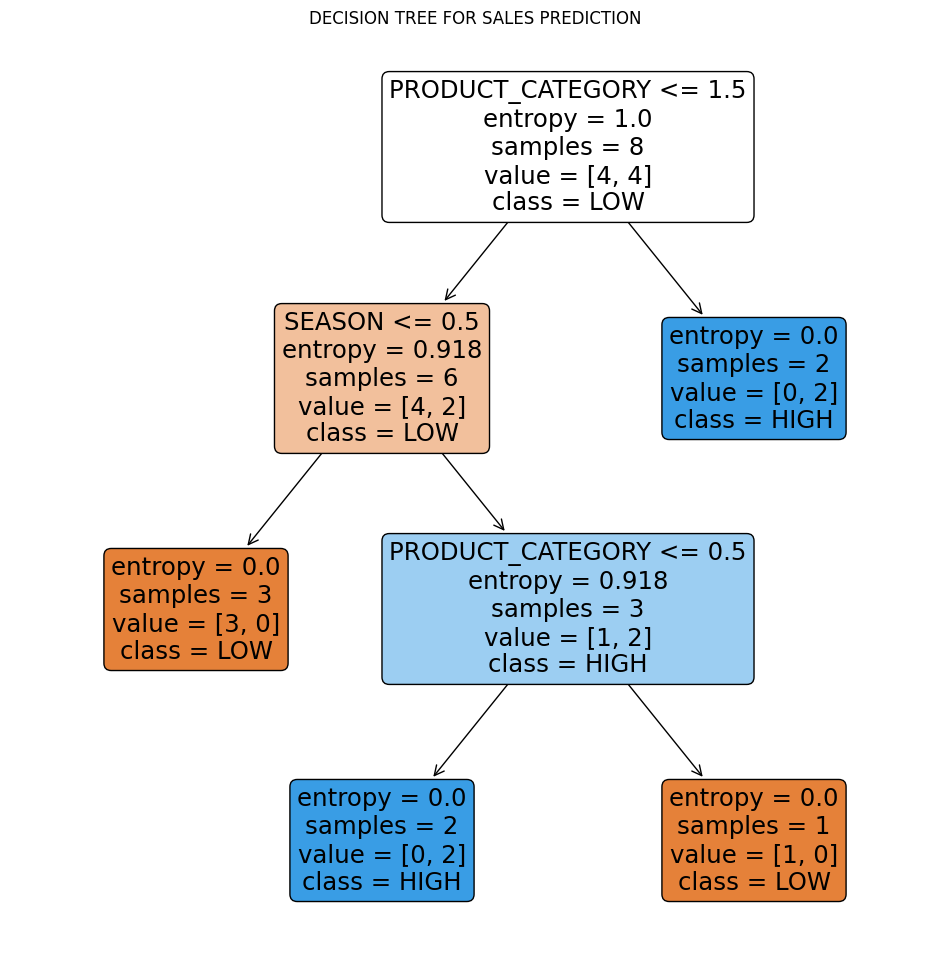

In [1]:
# got output
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Sample dataset representing retail sales
data = {
    'MARKETING_SPEND': [1500, 2300, 3200, 1800, 1200, 2500, 3500, 4000, 1700, 3000],
    'PRODUCT_CATEGORY': ['ELECTRONICS', 'CLOTHING', 'ELECTRONICS', 'CLOTHING', 'FURNITURE', 'ELECTRONICS', 'CLOTHING', 'FURNITURE', 'ELECTRONICS', 'CLOTHING'],
    'SEASON': ['HOLIDAY', 'REGULAR', 'HOLIDAY', 'REGULAR', 'HOLIDAY', 'REGULAR', 'HOLIDAY', 'REGULAR', 'HOLIDAY', 'REGULAR'],
    'STORE_TYPE': ['PHYSICAL', 'ONLINE', 'PHYSICAL', 'ONLINE', 'PHYSICAL', 'ONLINE', 'PHYSICAL', 'ONLINE', 'PHYSICAL', 'ONLINE'],
    'SALES': ['HIGH', 'LOW', 'HIGH', 'LOW', 'LOW', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'LOW']
}

# Convert into a DataFrame
df = pd.DataFrame(data)

# FEATURE ENCODING (LABEL ENCODING FOR categorical data)
lbl_encoder = LabelEncoder()

df['PRODUCT_CATEGORY'] = lbl_encoder.fit_transform(df['PRODUCT_CATEGORY'])
df['SEASON'] = lbl_encoder.fit_transform(df['SEASON'])
df['STORE_TYPE'] = lbl_encoder.fit_transform(df['STORE_TYPE'])
df['SALES'] = lbl_encoder.fit_transform(df['SALES'])

# Split dataset into features (X) and target (Y)
X = df.drop(['SALES'], axis=1)  # Features
y = df['SALES']  # Target

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier model
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"ACCURACY: {accuracy * 100:.2f}%")
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

# VISUALIZE THE DECISION TREE
plt.figure(figsize=(12, 12))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['LOW', 'HIGH'], rounded=True)
plt.title("DECISION TREE FOR SALES PREDICTION")
plt.show()